## <center>Report of homework01 IFT6390</center>

#### Team Member
Qiang Ye (20139927), Lifeng Wan (20108546)
#### Coding Environment
python 3.5.2, numpy 1.14.2 matplotlib 2.2.0

---------------

### 1. Small exercise on probabilities [10 points]

A few years ago, a study was carried out with doctors in the United States, in order to measure their "probabilistic intuition". It included the following
question:

A percentage of 1.5% of women in their 40s who take a routine test (mammogram) have breast cancer. Among women that have breast cancer, there is a 87% chance that the test is positive. In women that do not have breast cancer, there is a probability of 9.6% that the test is positive.

A woman in her forties who has passed this routine test receives a positive test result. What is the probability that it is actually breast cancer?

* A) more than 90%
* B) between 70% and 90%
* C) between 50% and 70%
* D) between 30% and 50%
* E) between 10% and 30%
* F) less than 10%

95% of doctors surveyed responded B). What do you think? Formalize the question and calculate the exact probability.

Hint: use Bayes rule ...

#### Answer 
We chose option **E**. The following is how we formalize, analyze and solve the question.

According to Bayes rule: 

\begin{align}
P(A\ |\ B)  & = \frac{P(B\ |\ A)\ P(A)}{P(B)} \\
&= \frac{P(B\ |\ A)\ P(A)}{P(A)\ P(B\ |\ A)+P(\overline A)\ P(B\ |\ \overline A)}
\end{align}
where $A$ and $B$ are events and $P(B)\neq 0$.

- $P(A\ |\ B)$ is a conditional probability: the likelihood of event $A$ occurring given that $B$ is true.
- $P(B\ |\ A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.
- $P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other.
- $P(\overline A)$ is the probability that event $A$ is **not** true.
- $P(B\ |\ \overline A)$ is a conditional probability: the likelihood of event $B$ occuring given that $A$ is **not** true.

Back to the question; we assume that the word "women" in the sentence "Among women that have breast cancer..." in second paragraph of the question refers to the women whose age are greater than 40 years and receive the test.

Let's notate two events:

- A represents the event that a woman **develops** breast cancer when she is older than 40 and receives the test.
- B represents the event that the routine test(mammogram) result is **positive** when a woman is older than 40 and receives the test.


Therefore, according to the information given by the question, we can say:
$$P(B\ |\ A)=0.87$$
$$P(B\ |\ \overline A)=0.096$$
and
$$P(A) = 0.015$$
To answer the question, we need to calculate $P(A\ |\ B)$.
We can easily get:
$$P(\overline A) =1-P(A)=1-0.015=0.985$$
Now, according to Bayes rule, we have all the results to calculate what we need:
\begin{align}
P(A\ |\ B)  & = \frac{P(B\ |\ A)\ P(A)}{P(B)} \\
&= \frac{P(B\ |\ A)\ P(A)}{P(A)\ P(B\ |\ A)+P(\overline A)\ P(B\ |\ \overline A)} \\
&= \frac{0.015×0.87}{0.015×0.87+0.985×0.096}\\
&\approx 0.121
\end{align}

0.121 is greater than 0.10 and less than 0.30; therefore, we choose option **E**.

### 2. Curse of dimensionality and geometric intuition in higher dimensions  [20 points]

**Q1** We consider a hyper-cube in dimension $d$ (this is a generalization of the $2D$ square and the $3D$ cube) with side length $c$ (which can be expressed in cm for example). What is the volume $V$ of this hypercube?

**Answer**

$V = c^d$

------

**Q2** We define a random vector $X$ of dimension $d(x \in \mathbb R^{d})$ distributed
uniformly within the hypercube (the probability density $p(x) = 0$ for all $x$ outside the cube). What is the probability density function $p(x)$ for $x$ inside the cube? Indicate which property(ies) of probability densities functions allow you to calculate this result.


**Answer** 

The probability density function for $x$ inside the hypercube is:
$$p(x)=\frac{1}{c^d}$$
The most direct property leading to this result is that a probability density function(PDF) $p$ must satisfiy:
$$\int p(x)dx = 1$$
given that x is sampled from a uniform distribution from a hypercube of $d$ dimension with the domain interval of $c$ cm for each, and given that $p(x)\geq 0$ for all possible $x$ within the hypercube while $p(x) = 0$ for all $x$ outside it.

------

**Q3** Consider the outter shell (border) of the hypercube of width 3% of $c$(covering the part of the hypercube extending from the faces of the cube and 0.03$c$ inwards). For example, if $c = 100cm$, the border will be $3cm$ (left, right, top, etc ...) and will delimit this way a second (inner) hypercube of side $100−3−3 = 94cm$. If we generate a point $x$ according to the previously defined probability distribution (by sampling), what is the probability that it falls in the border area? What is the probability that it falls in the smaller hypercube?

**Answer**

The probabilities are determined by the ratio of the volume from which a point is sampled to the volume of the original hypercube. The volume of smaller hypercube is easy to calculate,
According to _Answer1_:
$$V_{smaller\_hypercube} = {[(1-0.03-0.03)c]}^d = 0.94^d c^d$$

Volume of the border area is the volume of original hypercube substract the volume of the smaller one. Thus,

$$V_{border\_area} = c^d - V_{smaller\_hypercube} = (1-0.94^d) c^d$$

Finally, the two probabilities are $(1-0.94^d)$ and $0.94^d$ respectively, where d is the dimension of the cubes.

------

**Q4** Numerically calculate the probability that $x$ will fall in the narrow border for the following values of d: 1, 2, 3, 5, 10, 100, 1000.

**Answer**

The probabilities are: 0.06, 0.116, 0.169, 0.266, 0.461, 0.998, 1.0. 

Thanks for the following codes:

In [1]:
def prob_cube(d):
    return round((1 - pow(0.94, d)), 3)
dims = [1, 2, 3, 5, 10, 100, 1000]
probs = []
for d in dims:
    probs.append(prob_cube(d))
print(probs)

[0.06, 0.116, 0.169, 0.266, 0.461, 0.998, 1.0]


------------

**Q5** What do you conclude about the distribution of points in higher dimensions, which is contrary to our intuition in smaller dimensions?

**Answer**

In higher dimensions, points are more likely sampled from the border area of a hypercube even if the border length in each dimension is relatively very small. Our intuition in smaller dimensions is just contrary: points are more likely distributed in the central area rather than in border area.

------------

### 3. Parametric Gaussian density estimation, v.s. Parzen window density estimation [35 points]

In this question we consider a dataset $D = \{x
^{(1)}, . . . , x^{(n)}\}$ with $x \in \mathbb R^d$.

1 . Suppose we have trained the parameters of an **isotropic** Gaussian density function on $D$ (by maximizing the likelihood) in order to estimate the probability density function.

 (a) Name these parameters and indicate their dimension.

**Answer:** 

The parameters for an isotropic Gaussian density function are the mean($\mu$) and the variance($\sigma^2$) where $\mu$ is a $d$ dimensional vector:

$$\mu = (\mu_1, \mu_2, \cdots, \mu_d)\ \in \mathbb R^d$$

and $\sigma^2$ is real (one dimension vector):
$$\sigma^2 \in \mathbb R$$

------

 (b) If we learn these parameters using the principle of maximum likelihood estimation, express the formula which will give us the value of the optimal parameters as a function of the data points in $D$ — indicate only the formula that calculates the result, you are not asked to rederive it (the formulas for the maximum likelihood estimator can be found at the end of slide set number 5 on the Gaussian distribution).

**Answer:**

The formulas for calculating the mean($\mu$) and the variance($\sigma^2$) are as follows:
$$\mu = (\mu_1, \mu_2, \cdots, \mu_d)\ \in \mathbb R^d$$
where
$$\mu_i = \frac{1}{n} \sum_{j=1}^{n} x_{i}^{(j)}$$
and

$$\sigma^2 = \text{determinant of } \{\Sigma\}$$

where $$\Sigma = \frac{1}{n}\sum_{j=1}^{n}(x^{(j)}-\mu)(x^{(j)}-\mu)^\prime $$

We also provided another method to calculate the value of $\sigma^2$ of an **isotropic** multivariate Gaussian distribution without knowing the covariance matrix($\Sigma$):
$$\sigma^2 = \sqrt[d]{\sigma_1^2 \ \sigma_2^2 \cdots \ \sigma_d^2}$$
where
$$\sigma_i^2= \frac{1}{n} \sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 $$

------

 (c) What is the algorithmic complexity of this training method, i.e. of the method calculating these parameters?


**Answer:** 

The algorithmic complexity for calculating the mean($\mu$) is $O(nd)$. 

For calculating the $\sigma^2$, if we use the covariance matrix, the complexity for getting the matrix is $O(nd^2)$ and the complexity for calculating determinant of the matrix depends on how the algorithm is implemented; the fastest implementation(fast matrix multiplication) has the complexity of $O(d^{2.373})$. So the overall complexity is the worse one of $O(d^{2.373})$ and $O(nd^2)$. 

If we use the second method to calculate $\sigma^2$, the complexity will be $O(nd)$.

------

 (d) For a test point $x$, write the function that will give the probability density predicted at point $x:\hat p_{gauss-isotrop}(x)=?$

**Answer:** 

$$\hat p_{gauss-isotrop}(x) =\frac{1}{(2\pi)^{d/2}\sigma^{d}}e^{-\frac{1}{2}\frac{\Vert\ (x-\mu)\ \Vert^{\ 2}}{\sigma^2}}$$

---------

 (e) What is the algorithmic complexity for calculating this prediction at each new point $x$?

**Answer:** 

The algorithmic complexity is $O(d)$.

------

2 . Now consider that one uses Parzen windows with an isotropic Gaussian kernel of width (standard deviation) $\sigma$ instead, and that these Parzen windows were trained on $D$.

 (a) Suppose that the user has fixed $\sigma$. What does the "traning/learning" phase of these Parzen windows consist of?


**Answer:** 

The estimator, during the "training/learning" phase, will only need to keep a reference of the training data, so that the data is accessable when the estimator does predicting.

------

 (b) For a test point $x$, write in a single detailed formula (i.e. with exponentials), the function that will give the probability density predicted at point $x:\hat p_{Parzen}(x)=?$
 

**Answer:** 
\begin{align}
\hat p_{Parzen}(x) &= \frac{1}{n}\sum_{j=1}^{n}\mathcal N_{x^{(j)},\sigma}\big(x\big) \\
&= \frac{1}{n}\sum_{j=1}^{n}\frac{1}{ \big(2\pi\big)^{\frac{d}{2}}\sigma^d}e^{-\frac{1}{2} \frac{{\Vert\  x-x^{(j)}\ \Vert\ \ }^{\ 2}}{\sigma^2}}\\
\end{align}

------

 (c) What is the algorithmic complexity for calculating this prediction at each new point $x$?

**Answer:** 

The algorithmic complexity is $O(nd)$.

------

3 . Capacity/Expressivity

 (a) Which one of these two approaches (parametric Gaussian v.s. Parzen Gaussian kernel) has the highest _capacity_ (in other words, higher expressivity)? Explain.
 
 **Answer:** 
 
 Parzen Gaussian kernel has higher expressivity. The reason is that: with the approach of parametric Gaussian, the algorithm tries to learn an **isotropic Gaussian distribution** from training dataset; the Parzen window algorithm, however, tries to learn **an unknown but more complex distribution** by  considering that each data sample's contribution with a Gaussian distribution kernal(fixed $\sigma$).
 
------
 
 (b) With which one of these approaches, and in which scenario, are we likely to be over-fitting(i.e. memorizing the noise in our data)?
 
 **Answer:** 
 
 Usually, Parzen window algorithm are more likely to be over-fitting the data, especially when it's parameter $\sigma$ is small.
 
------
 
 (c) The value $\sigma$ in Parzen windows is usually treated as a hyper-parameter, whereas for parametric Gaussian density estimation it is usually treated as a parameter. Why?
 
 **Answer:** 
 
 In machine learning, a hyper-parameter usually refers to a parameter whose value is automatically or manualy tuned through validation process and non-changeable during a training process, whereas parameter(s) is(are) usually learned from training dataset automatically through specific machine learning algorithms. According to two density estimation algorithms, we can easily find that $\sigma$ in Parzen window is set manually, while the parameters($\mu, \sigma, or\ \Sigma)$ are learned from training dataset. Therefore, we treat $\sigma$ in Parzen windows as a hyper-parameter and $(\mu, \sigma, or\ \Sigma)$ in Gaussian density estimator as parameters.
 
------

4 . Now consider parametric density estimation with a diagonal Gaussian density function.

 (a) Express the equation of a diagonal Gaussian density in $\mathbb R^d$. Specify what are its parameters and their dimensions.

**Answer:** 

The equation of a diagonal Gaussian density estimator in $\mathbb R^d$ is:
$$ p(x) = \mathcal N_{\mu,\Sigma}\big(x\big)=\frac{1}{\big(2\pi\big)^{d/2} \sqrt{\vert\Sigma\vert}}e^{-\frac{1}{2}(x-\mu)^{T}\ \Sigma^{-1}\ (x-\mu)} $$

In this formular, $\mu$ and $\Sigma$ are parameters, where:

$$\mu = \frac{1}{n}\sum_{j=1}^{n}x_j$$ is a $d$ dimensional vector, and

$$\Sigma = 
\begin{bmatrix}\sigma_{1}^{2} & 0 & \cdots & 0 \\\\ 
0 & \sigma_{2}^{2} & \cdots & \vdots \\\\
\vdots & \cdots & \ddots & 0 \\\\
0 & \cdots & 0 & \sigma_{d}^{2} \\\\
\end{bmatrix}$$

is a diagonal matrix indicating the variance is also $d$ dimensional.

------

 (b) Show that the components of a random vector following a diagonal Gaussian distribution are independent random variables.

**Answer:** 

Random variables $X=(X_1,X_2,\cdots,X_d) \in \mathbb R^d$ are independent if:
$$p(x_1,\cdots,x_d) = p(x_1)\ p(x_2)\cdots p(x_d)$$
where $p(x_i)$ is the probability density function(pdf) of $i_{th}$ dimensional component of random variable $x$.

Assume that we have the multivariate Gaussian estimator with the parameters $\mu$ and $\Sigma$ as shown in question 4(a); 

then

\begin{align}
p(x;\mu,\Sigma) &= \frac{1}{\big(2\pi \big)^{d/2} \sqrt{\vert\Sigma\vert}}e^{-\frac{1}{2}(x-\mu)^{T}\ \Sigma^{-1}\ (x-\mu)} \\
&= \frac{1}{\big(2\pi \big)^{d/2} \sigma_1 \sigma_2 \cdots, \sigma_d}e^{-\frac{1}{2}\begin{pmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2 \\
\vdots \\
x_d - \mu_d \\
\end{pmatrix}^{T}\ 
\begin{pmatrix}\sigma_{1}^{-2} & 0 & \cdots & 0 \\
0 & \sigma_{2}^{-2} & \cdots & \vdots \\
\vdots & \cdots & \ddots & 0 \\
0 & \cdots & 0 & \sigma_{d}^{-2} \\
\end{pmatrix}\ 
\begin{pmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2 \\
\vdots \\
x_d - \mu_d \\
\end{pmatrix}
} \\
&=\frac{1}{\big(2\pi \big)^{d/2} \sigma_1 \sigma_2 \cdots, \sigma_d}e^{-\frac{1}{2}\begin{pmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2 \\
\vdots \\
x_d - \mu_d \\
\end{pmatrix}^{T}\ 
\begin{pmatrix}
\frac{1}{\sigma_1^2}(x_1-\mu_1)\\
\frac{1}{\sigma_2^2}(x_2-\mu_2)\\
\vdots \\
\frac{1}{\sigma_d^2}(x_d-\mu_d)\\
\end{pmatrix}
} \\
&=\prod_{i=1}^{d} \frac{1}{\sqrt{2\pi}\sigma_{i}}e^{-\frac{1}{2\sigma_{i}^2} \big(x_i-\mu_i\big)^2}\\
&= \prod_{i=1}^{d} p(x_i,\mu_i,\sigma_i^2) \\
\end{align}

which indicates that the probability density value of a random variable in a diagonal Gaussian distribution equals to the multiplication of the probability density values of all its components which can be considered as an univariate Gaussian distribution.

Therefore, all the components are independent.

------

 (c) Using $-log\ p(x)$ as the loss, write down the equation corresponding to the empirical risk minimization on the training set $D$(in order to learn the parameters).

**Answer:** 

The empirical risk on the training set $D$ is:
$$ Loss_{(D)} = \frac{1}{n} \sum_{j=1}^{n} -log\ p(x^{(j)}) $$
where,
\begin{align}
-log\ p(x) &= -log\ \Bigl( \frac{1}{\big(2\pi\big)^{d/2} \sqrt{\vert\Sigma\vert}}e^{-\frac{1}{2}(x-\mu)^{T}\ \Sigma^{-1}\ (x-\mu)} \Bigr) \\
&= -log\ \prod_{i=1}^{d} p(x_i,\mu_i,\sigma_i^2) \\
\end{align}
Therefore, 
\begin{align}
Loss_{D} &= \frac{1}{n} \sum_{j=1}^{n} -log\ \prod_{i=1}^{d} p(x_i^{(j)},\mu_i,\sigma_i^2) \\
&= \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} -log\ p(x_i^{(j)},\mu_i,\sigma_i^2)  \\
&= \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} -log\ 
\Bigl(\frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{(x_i^{(j)}-\mu_i)^2}{2\sigma_i^2}}  \Bigr)\\
&=\sum_{i=1}^{d}\Bigl( \frac{1}{n} \sum_{j=1}^{n}  -log\ 
\Bigl(\frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{(x_i^{(j)}-\mu_i)^2}{2\sigma_i^2}}  \Bigr)\Bigr)\\
\end{align}

Let 
$$
loss_{D_i}\ (\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})= \frac{1}{n} \sum_{j=1}^{n}  -log\ \Bigl(\frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{(x_i^{(j)}-\mu_i)^2}{2\sigma_i^2}}\Bigr)
$$
then
$$Loss_{D}=\sum_{i=1}^{d} loss_{D_i}\ (\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})$$

------

 (d) Solve this equation analytically in order to obtain the optimal parameters.

**Answer**

According to the equation we provided in the last question, the total loss on training dataset $D$ can be considered as a summation of the losses on each univariate Gaussian density estimator.

Since the procedure of optimizing the parameters($\mu_i, \sigma_i^2$) of each univariate Gaussian density estimator is the same, We only need to find the optimization procedure for one univariate Gaussian density estimator.

Here is the procedure:
\begin{align}
loss_{D_i}(\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}) &=  \frac{1}{n} \sum_{j=1}^{n}  -log\ 
\Bigl(\frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{(x_i^{(j)}-\mu_i)^2}{2\sigma_i^2}}  \Bigr)\\
&= \frac{1}{n} \sum_{j=1}^{n} \Bigl(\frac{(x_i^{(j)}-\mu_i)^2}{2\sigma_i^2} + \frac{1}{2} log\ \sigma_i^2 + \frac{1}{2} log\ (2\pi)   \Bigr) \\
&= \frac{1}{n} \Bigl( \frac{1}{2\sigma^2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 + \frac{n}{2}log\ \sigma_i^2 + \frac{n}{2}log\ (2\pi) \Bigr) \\
\end{align}
To minimize $loss_{D_i}$, we need:
$$\frac{\partial}{\partial \mu_i} loss_{D_i}(\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}) = 0 $$
$$\frac{\partial}{\partial \sigma_i^2} loss_{D_i}(\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}) = 0 $$
The partial derivative of the $loss_{D_i}$ with respect to $\mu_i$ is
\begin{align}
& \frac{\partial}{\partial \mu_i}\ loss_{D_i}(\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}) \\
&= \frac{\partial}{\partial \mu_i} \Bigl(  \frac{1}{n} \Bigl( \frac{1}{2\sigma^2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 + \frac{n}{2}log\ \sigma_i^2 + \frac{n}{2}log\ (2\pi) \Bigr) \Bigr) \\
&= \frac{1}{n \sigma_i^2} \sum_{j=0}^{n}(x_i^{(j)}-\mu_i)\\
&= \frac{1}{n \sigma_i^2} \Bigl( \sum_{j=0}^{n}x_i^{(j)}-n\mu_i \Bigr)\\
\end{align}
which is equal to zero only if 
$$\sum_{j=1}{n}x_i^{(j)}-n\mu_i = 0$$
Therefore:
$$\mu_i=\frac{1}{n}\sum_{j=1}{n}x_i^{(j)}$$


The partial derivative of the $loss_{D_i}$ with respect to $\sigma_i^2$ is
\begin{align}
& \frac{\partial}{\partial \sigma_i^2}\ loss_{D_i}(\mu_i, \sigma_i^2, x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}) \\
&= \frac{\partial}{\partial \sigma_i^2} \Bigl(  \frac{1}{n} \Bigl( \frac{1}{2\sigma^2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 + \frac{n}{2}log\ \sigma_i^2 + \frac{n}{2}log\ (2\pi) \Bigr) \Bigr) \\
&= \frac{1}{n}\Bigl(\frac{n}{2\sigma_i^2}+\Bigl[\frac{1}{2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 \Bigr] \frac{d}{d\ \sigma_i^2} \Bigl(\frac{1}{\sigma_i^2} \Bigr) \Bigr) \\
&= \frac{1}{n}\Bigl(\frac{n}{2\sigma_i^2}+\Bigl[\frac{1}{2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 \Bigr] \Bigl(-\frac{1}{(\sigma_i^2)^2} \Bigr) \Bigr) \\
&= -\frac{1}{2n\sigma_i^2}\Bigl[\frac{1}{\sigma_i^2}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2 - n \Bigr] \\
\end{align}

which, if we rule out $\sigma_i^2 = 0$, is equal to zero only if
$$\sigma_i^2 = \frac{1}{n}\sum_{j=1}^{n}(x_i^{(j)}-\mu_i)^2$$

Thus for each $i_{th}$ dimensional univariate Gaussian density estimator, the optimizied parameters are:
$$\hat{\mu_i} = \frac{1}{n} \sum_{j=1}^{n}x_i^{(j)}$$
$$\hat{\sigma_i^2}=\frac{1}{n}\sum_{j=1}^{n}(x_i^{(j)}-\hat{\mu_i})^2$$

------

### 4. Practical part: density estimation [35 points]

1 . Implement a diagonal Gaussian parametric density estimator. It will have to work for data of arbitrary dimension $d$. As seen in the labs, it should have a **train()** method to learn the parameters and a method **predict()** which calculates the log density.

**Answer / Code** 

Before we implement a diagonal Gaussian parametric density estimator and a Parzen windows density estimator, we first implemented a function calculating log of the probability density value for a variable $x \in \mathbb R$ from an univariate Gaussian distribution and a function calculating log of the probability density value for a variable $x \in \mathbb R^d$ from a diagonal multivariate Gaussian distribution:

In [2]:
import numpy as np
%pylab inline

def univar_gauss_log_pdf(x, mean = 0, variance = 1):
    """calculating log of the density for variable x in 1 dimension.
    params
        x: random variable with dimension of 1. no.float
        mean: mean of the univariate Gaussian distribution.  np.float
        variance: variance of the univariate Gaussian distribution. np.float
    return
        log(probability density) for the variable x. np.float
    """
    # result = 1.0/np.sqrt(variance * 2 * np.pi)
    # result *= np.exp(-1 * np.power((x-mean), 2)/(2 * variance))
    # return np.log(result)
    result = -1 * np.power((x-mean), 2)/(2 * variance)
    result += np.log(1.0/np.sqrt(variance * 2 * np.pi))
    return result

def multivar_gauss_log_pdf(x, mean, variance):
    """return log of the density for a variable vector from a multivariate
    Gaussian distribution
    params 
        x: variable vector d dimension. np.array shape(d,1)
        mean: mean vector d dimension. np.array shape(d,1)
        variance: variance vector d dimension. np.array shape(d,1)
    return
        log(probability density) for the variable vector x. float        
    """
    x = x.reshape(-1,1) 
    mean, variance = mean.reshape(-1,1), variance.reshape(-1,1)

    assert (mean.shape[0] == variance.shape[0] and
        x.shape[0] == mean.shape[0]), "dimension not equal"
    d = x.shape[0] # dimension of x
    log_p = 0
    for i in range(d): # all components are independent.
        log_p += univar_gauss_log_pdf(x[i,0],mean[i,0],variance[i,0])
    return float(log_p)

Populating the interactive namespace from numpy and matplotlib


Now the implementation of Guanssian density estimator:

In [3]:
class GaussianDensityEstimator():
    """Multivariate Gaussian Density Estimator. Two different types for 
    calculating mean and variance(matrix) are provided.
    """
    def __init__(self, dim = 1):
        self._d = dim # dimension 
        self._mean = None # shape(d, 1)
        self._variance = None # shape(d, 1)

        # these two variables are the mean and cov_matrix for a general
        # multivariate Gaussian distribution estimator.
        self._mu = None # shape(d, 1)
        self._cov_matrix = None # shape(d, d)
        

    def train(self, data):
        """train the parameters of a diagonal Gaussian parametric
        density estimator: mean and variance
        params:
            data: training dataset R^d. np.array, shape(n, d) or (n, )
        return:
            mean: column vector d dimension. np.array, shape(d, 1)
            variance: column vector with d dimension. np.array shape(d, 1)
        """
        if data.ndim <= 1: # 1d data
            data = data.reshape(-1, 1)
        n, dim = data.shape
        self._d = dim
        mean = np.average(data, axis = 0) # shape(d, )
        variance = np.average(np.power((data - mean), 2), axis = 0) #shape(d,)
        mean = mean.reshape(-1, 1)
        variance = variance.reshape(-1, 1)
        self._mean, self._variance = mean, variance
        return mean, variance
    

    def predict(self, X):
        """predict log PDF using diagonal Gaussian distribution
        params 
            X: test data. np.array, shape(n, d)
        return
            log_density. np.array, shape(n, )
        """
        if X.ndim <= 1:
            X = X.reshape(-1, 1)
        n, dim = X.shape
        assert dim == self._d, """training data should have\
            same dimension of predict data"""
        log_density = np.zeros(n)
        for j in range(n):  # each test data
            log_density[j] = multivar_gauss_log_pdf(X[j,:], 
                                                    self._mean, 
                                                    self._variance)
        return log_density 
    
        
    def train2(self, data):
        """train the parameters of a general multivariate Gaussian 
        parametric density estimator: mean and co-variance matrix
        params:
            data: training dataset R^d. np.array, shape(n, d) or (n, )
        return:
            mean: column vector d dimension. np.array, shape(d, 1)
            cov_matrix: cov variance matrix. np.array shape(d, d)
        """
        if len(data.shape) == 1: # 1d data
            data = data.reshape(-1,1) # convert to matrix
        n, dim = data.shape
        self._d = dim # dimension of data
        mean = np.average(data, axis = 0).reshape(-1,1)
        cov_matrix = np.zeros((dim, dim))
        for i in range(n):
            temp = data[i,:].reshape(-1, 1) - mean
            cov_matrix += np.dot(temp, temp.T)
        cov_matrix /= n
        self._mu, self._cov_matrix = mean, cov_matrix
        return mean, cov_matrix 
    
    
    def predict2(self, X): # multiple sample supported
        """predict log PDF using general multivariate Gaussian 
        distribution. Using the equation in question 3.4(a).
        params
            X: test data. np.array, shape(n, d)
        return
            log_density. np.array, shape(n, )
        """
        if X.ndim <= 1: # 1d
            X = X.reshape(-1, 1) # column vector
        n, dim = X.shape
        assert dim == self._d, """training data should have\
            same dimension of predict data"""
        det_matrix = np.linalg.det(self._cov_matrix)
        factor = 1/(pow(2 * np.pi, dim/2) * np.sqrt(det_matrix))
        # print(sqrt(det_matrix))
        cov_matrix_I = np.array(np.matrix(self._cov_matrix).I)
        result = np.zeros(n)
        for j in range(n):
            diff = X[j,:].reshape(-1, 1) - self._mu
            expo = np.dot(diff.T, cov_matrix_I)
            expo = -0.5 * np.dot(expo, diff)
            result[j] = factor * np.power(np.e, expo)
        return np.log(result) 

Testing code for the estimator:

In [4]:
# testing code: generate training data from a certain multivariate Gaussian 
# distribution
n, dim = 20000, 4 # size and dimension of taining dataset
true_mean = np.array([2.5, 3.0, 3.5, 4.0])
true_var = np.array([0.6, 0.8, 1.0, 1.2])
data = np.zeros((n, dim))
for i in range(dim): # for each dimension(vector component)
    # generate data from a certain univariate Gaussian Distribution
    sub_data = np.sqrt(true_var[i]) * np.random.randn(n, 1) + true_mean[i]
    data[:,i] = sub_data[:,0]

gaus = GaussianDensityEstimator()
gaus.train(data)
gaus.train2(data)
# print(gaus._mu)
# print(gaus._mean)
# print(gaus._cov_matrix)
# print(gaus._variance)

test_X = np.random.rand(10, 4)
density_1 = gaus.predict(test_X)
density_2 = gaus.predict2(test_X)
# print(density_1)
# print(density_2)

2 . Implement a Parzen density estimator with an isotropic Gaussian kernel. It will have to work for data of arbitrary dimension $d$. Likewise it should have a **train()** method and a **predict()** method that computes the log density.

**Answer / Code**

In [5]:
class ParzenDensityEstimator():
    """ a Parzen density estimator using a kernal of Gaussian 
    distribution with fixed variance
    """
    def __init__(self, dim = 1, sigma = 0.5):
        self._d = dim # dimension of data
        self._sigma = sigma # sqrt(variance)
        self._data = None
        

    def train(self, data):
        """This method just keep a reference of the training data which
        is a parameter, and upgrade the dimension value.
        """
        if data.ndim <= 1:
            data = data.reshape(-1, 1)
        self._data = data
        self._d = data.shape[1]
        pass
   
    
    def predict(self, X, sigma = 1):
        """predict log PDF using Parzen windows estimator.
        using the equation in question 3.2(b).
        params
            X: test data. np.array, shape(n, d)
            sigma: hyper-parameter, the standard deviation of Gaissian 
            distribution kernal. float
        return
            log_density. np.array, shape(n, )
        """
        if X.ndim <= 1: # 1d
            X = X.reshape(-1, 1) # column vector
        m, dim = X.shape # m is the size of testing data X
        n = self._data.shape[0] # n is the size of training data 
        assert dim == self._d, """training data should have\
            same dimension of predict data"""
        variance = sigma * sigma * np.ones(self._d)
        result = np.zeros(m) + 1e-20 # avoid np.log(0)
        for j in range(m): # for each test data
            for i in range(n): # each training data
                mean = self._data[i,:] # each training data as a mean
                # probability density is the sum of all kernal probabilities
                result[j] += np.exp(multivar_gauss_log_pdf(X[j,:], mean, variance))
        return np.log(result/n)

3 . 1D densities: From the Iris dataset examples, choose a subset corresponding to one of the classes (of your choice), and one of the characteristic features, so that we will be in dimension $d=1$ and produce a single graph (using the plot function) including:

 (a) the the data points of the subset (displayed on the x axis).
 
 (b) a plot of the density estimated by your parametric Gaussian estimator.
 
 (c) a plot of the density estimated by the Parzen estimator with a hyper-parameter $\sigma$ (standard deviation) too small.
 
 (d) a plot of the density estimated by the Parzen estimator with the hyper-parameter $\sigma$ being a little too big.
 
 (e) a plot of the density estimated by the Parzen estimator with the hyper-parameter $\sigma$ that you consider more appropriate. Use a different color for each plot, and provide your graph with a clear legend.

**Answer / Code(a-e)**:

area:0.9975467585688796. wrong density estimator?


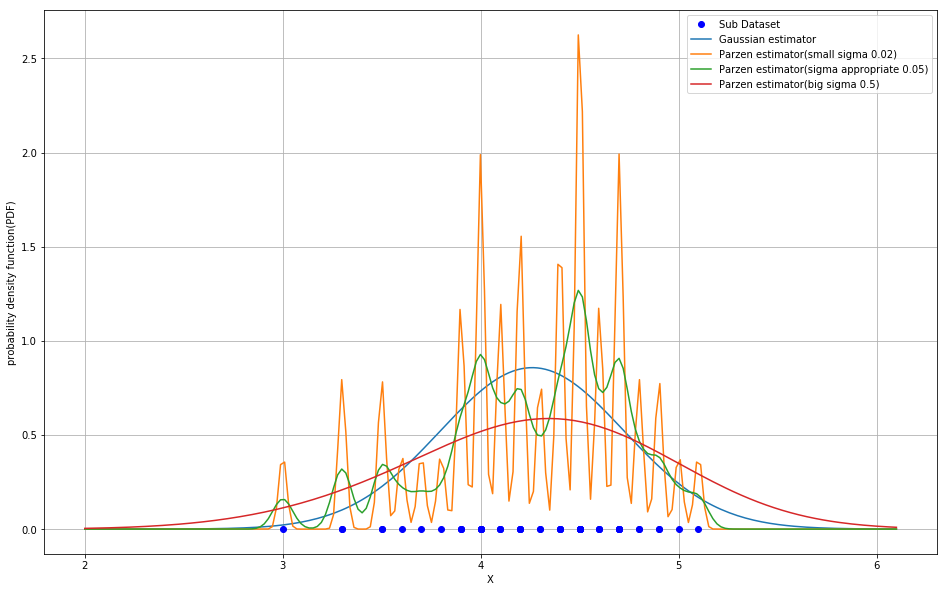

In [6]:
import matplotlib.pyplot as plt

iris = np.loadtxt("iris.txt")
data = iris[iris[:,4] == 2][:,2] # choose 3rd feature, class 2 of Data
data_y_value = data * 0  # draw data on Axis X.

interval_num = 200
min_d, max_d = min(data), max(data)
support = np.linspace(min_d - 1, max_d + 1, interval_num)

# test whether the area under pdf is close to 1.0
def validate_prob(support, result):
    area = 0.0
    for i in range(len(support)-1):
        area += (support[i+1]-support[i])*(result[i]+result[i+1])/2
    # print(area)
    if abs(area - 1.0) > 1e-3:
        print("area:{}. wrong density estimator?".format(area))
    
# in following cases, the value of area may not very close to 1:
# 1. sigma is too large 
# 2. integration interval is not large enough.
# 3. interval_num (100) is not large enough.
# also see the curves to validate the accumulate probability.

gauss_estimator = GaussianDensityEstimator()
gauss_estimator.train(data)
pdf_gauss = np.exp(gauss_estimator.predict(support)) # convert to probs.

parzen_estimator = ParzenDensityEstimator()
parzen_estimator.train(data)

pdf_parzens = []
sigmas = [0.02, 0.05, 0.5]
for sigma in sigmas:
    result = np.exp(parzen_estimator.predict(support, sigma))
    pdf_parzens.append(result)
    validate_prob(support, result)

plt.figure(figsize=(16,10))
plt.plot(data, data_y_value, 'bo')
plt.plot(support, pdf_gauss) 
for pdf_parzen in pdf_parzens:
    plt.plot(support, pdf_parzen)

plt.grid(True) # add a grid
plt.xlabel('X')
plt.ylabel('probability density function(PDF)')
plt.legend(('Sub Dataset',
            'Gaussian estimator',
            'Parzen estimator(small sigma 0.02)',
            'Parzen estimator(sigma appropriate 0.05)',
            'Parzen estimator(big sigma 0.5)',
             ))
plt.show()

 (f) Explain how you chose your hyper-parameter $\sigma$.

**Answer**

We tried several values of hyper-parameter $\sigma$, such as 0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, etc. We compared the shapes of the curve with the parametric Gaussian density curve we learned. 

We think if there are many sharp spikes in a Parzen windows density curve, the $\sigma$ is too small because the estimator takes too much information from the training data samples which will have large chance to be overfitting. 

If the curve is flatter than the curve of the parametric Gaussian density estimator we learned, the $\sigma$ is thought too large becuase Parzen windows density estimator normally has more capacity than parametric Gaussian density estimator. 

if a Parzen windows estimator curve has several crosses with the parametric Gaussian density estimator curve, it is considered to be an appropriate $\sigma$. 

Finaly, we chose 0.02, 0.05, 0.5 as the threes $\sigma$s(too small, appropriate,and too big) repectively to draw the curves of Parzen windows density estimators.

--------------

4 . 2D densities: Now add a second characteristic feature of Iris, in order to have entries in $d=2$ and produce 4 plots, each displaying the points of the subset of the data (with the plot function), and the contour lines of the density estimated (using the contour function):

 (a) by the diagonal Gaussian parametric estimator.
 
 (b) by the Parzen estimator with the hyper-parameter $\sigma$ (standard deviation) being too small.
 
 (c) by the Parzen estimator with the hyper-parameter $\sigma$ being a little too big.
 
 (d) by the Parzen estimator with the hyper-parameter $\sigma$ that you consider more appropriate.
 
 (e) Explain how you chose your hyper-parameter $\sigma$.
 

**Answer / Code(a)**

<a list of 6 text.Text objects>

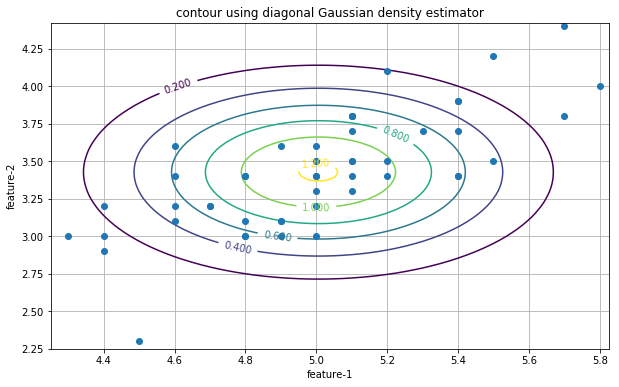

In [7]:
# choose the first and second feature of data with the class of 1
data2 = iris[iris[:,4] == 1][:,0:2] 

delta = 0.025
margin = 2 * delta # better display
min_x, max_x = min(data2[:,0]), max(data2[:,0])
min_y, max_y = min(data2[:,1]), max(data2[:,1])
x = np.arange(min_x - margin, max_x + margin, delta)
y = np.arange(min_y - margin, max_y + margin, delta)
X, Y = np.meshgrid(x, y)
m, n = X.shape

gauss = GaussianDensityEstimator()
gauss.train(data2)
# prepare test data
test_data = np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis = 1)
Z = np.exp(gauss.predict(test_data)).reshape(m, n)

plt.figure(figsize=(10, 6))
plt.plot(data2[:,0], data2[:,1], 'o') 
plt.grid(True) 
plt.xlabel('feature-1')
plt.ylabel('feature-2')
cs = plt.contour(X,Y,Z)
plt.title("contour using diagonal Gaussian density estimator")
plt.clabel(cs, inline=1, fontsize=10)

We did some extra work: drawing a general multivariate Gaussian distribution contour using the following codes:

<a list of 7 text.Text objects>

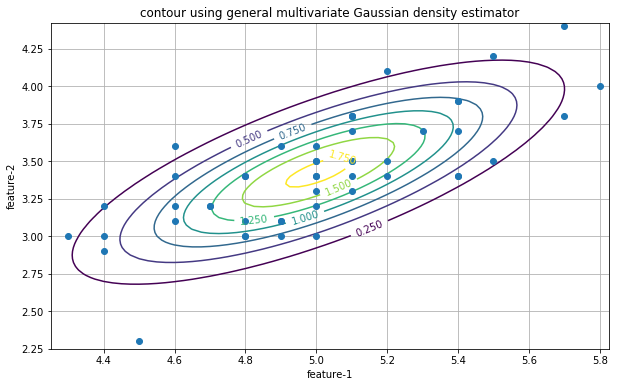

In [8]:
gauss.train2(data2)
Z_2 = np.exp(gauss.predict2(test_data)).reshape(m, n)

plt.figure(figsize=(10, 6))
plt.plot(data2[:,0], data2[:,1], 'o') 
plt.grid(True) 
plt.xlabel('feature-1')
plt.ylabel('feature-2')
cs = plt.contour(X,Y,Z_2)
plt.title("contour using general multivariate Gaussian density estimator")
plt.clabel(cs, inline=1, fontsize=10)


---------------

**Answer / Code (b-d)**

Before answering the question b-d, we created an instance of Parzen window density estimator and defined a function which draws a contour with a parameter sigma determining the variance of the isotropic Gaussian kernel. 

Here is the code:

In [9]:
parzen = ParzenDensityEstimator()
parzen.train(data2)

def draw_parzen_contour(sigma = 0.005):
    plt.figure(figsize=(10, 6))
    plt.plot(data2[:,0], data2[:,1], 'o')
    Z = np.exp(parzen.predict(test_data, sigma)).reshape(m, n)
    cs = plt.contour(X, Y, Z)
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.clabel(cs, inline=1, fontsize=10)
    plt.title("contour using Parzen windows($\sigma$ = {})".format(sigma))

-----------

**Answer(b)**

Contour by Parzen estimator with the hyper-parameter $\sigma$ (standard deviation) being too small.

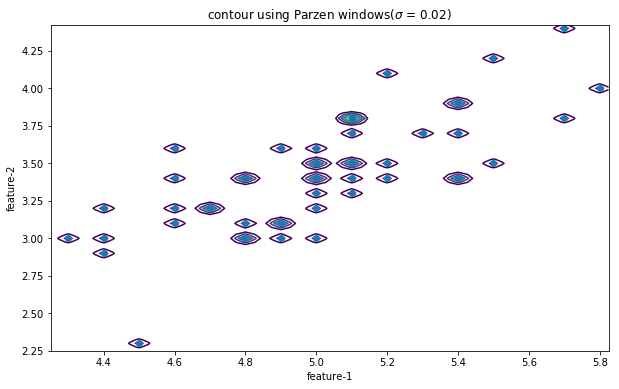

In [10]:
draw_parzen_contour(sigma = 0.02)

-----------

**Answer(c)**

Contour by Parzen estimator with the hyper-parameter $\sigma$ (standard deviation) being too large.

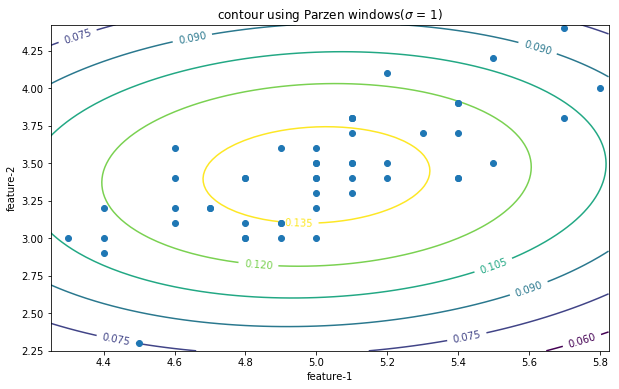

In [11]:
draw_parzen_contour(sigma = 1)

------------

**Answer(d)**

Contour by the Parzen estimator with the hyper-parameter $\sigma$ that we consider more appropriate.

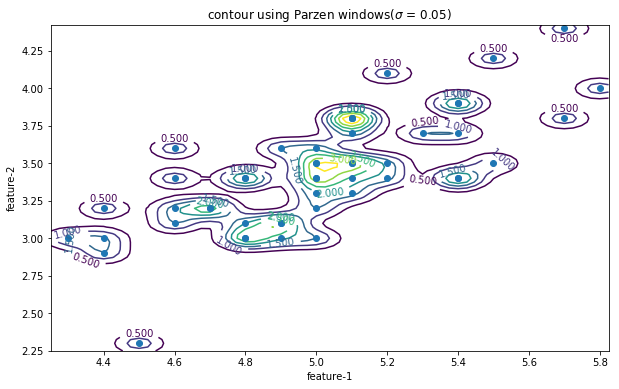

In [12]:
draw_parzen_contour(sigma = 0.05)

**Answer(e)** 

Like the case in 1D, We also tried several values of hyper-parameter $\sigma$ and observed these contour curves. 

In our opinion, $\sigma$s that lead to contour curves very close and tight to the training data samples are considered too small; $\sigma$s that produce the contour curves much similar with circle or eclipse are considered too large; $\sigma$s with which the contour curves not only reflect well the gathering (density) of training data samples but also are not too circle/eclipse like are considered to be appropriate $\sigma$s. 

Finaly, we chose 0.02, 0.05, 1.00 as the threes $\sigma$s(too small, appropriate,and too big) to draw the contour curves.

## The end of the report.
--------------------

#### Team Member
Qiang Ye (20139927), Lifeng Wan (20108546)
#### Coding Environment
python 3.5.2, numpy 1.14.2 matplotlib 2.2.0